In [1]:
from bs4 import BeautifulSoup
import numpy as np
from nltk.corpus import stopwords
import os
import codecs
from nltk.stem import SnowballStemmer
from nltk.tokenize import WordPunctTokenizer
import re
import collections
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import ward, dendrogram, linkage
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
import nltk
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib as mpl
from sklearn.manifold import MDS











%matplotlib inline

In [2]:
#Process the texts; tokenize etc.

#Parameters
#remove words less than a specific number of characters
min_token_size = 2
#remove english stopwords
stopwords_en = set(stopwords.words('english'))
#Remove numbers etc.
word_patter = re.compile("^[^\d\W]+$")
stemmer = SnowballStemmer('english')


def process_text(text):
    #Tokenization
    tokens = WordPunctTokenizer().tokenize(text)
    
    
    #Convert to lowercase
    tokens = list(map(lambda x: x.lower(), tokens))
    
    
    #Cleaning, stemming
    
    tokens = [stemmer.stem(token) for token in tokens if re.match(word_patter, token) and token not in stopwords_en and len(token)>min_token_size]
    
    
    #Join tokens in text
    text = ' '.join(tokens)
    return text
    #return collections.Counter(tokens), len(tokens)
    
    
#process_text(text.read()) 

In [3]:
#Append the processed text into a list.

data_books = os.getcwd() + '/gap-text'
def get_books():
    books = []
    books_name = []
    for i, book in enumerate(os.listdir(data_books)):
        book_path = data_books + '/' + book
        book_name = book.split('.')[0]
        books.append(process_text(codecs.open(book_path, 'r', encoding = 'utf-8').read()))
        books_name.append(book_name)
        print 'Processing:', i, book
    return books, books_name 

books, books_name = get_books()
    
    
    
    




Processing: 0 gap_-C0BAAAAQAAJ.txt
Processing: 1 gap_2X5KAAAAYAAJ.txt
Processing: 2 gap_9ksIAAAAQAAJ.txt
Processing: 3 gap_aLcWAAAAQAAJ.txt
Processing: 4 gap_Bdw_AAAAYAAJ.txt
Processing: 5 gap_CnnUAAAAMAAJ.txt
Processing: 6 gap_CSEUAAAAYAAJ.txt
Processing: 7 gap_DhULAAAAYAAJ.txt
Processing: 8 gap_dIkBAAAAQAAJ.txt
Processing: 9 gap_DqQNAAAAYAAJ.txt
Processing: 10 gap_fnAMAAAAYAAJ.txt
Processing: 11 gap_GIt0HMhqjRgC.txt
Processing: 12 gap_IlUMAQAAMAAJ.txt
Processing: 13 gap_m_6B1DkImIoC.txt
Processing: 14 gap_MEoWAAAAYAAJ.txt
Processing: 15 gap_ogsNAAAAIAAJ.txt
Processing: 16 gap_pX5KAAAAYAAJ.txt
Processing: 17 gap_RqMNAAAAYAAJ.txt
Processing: 18 gap_TgpMAAAAYAAJ.txt
Processing: 19 gap_udEIAAAAQAAJ.txt
Processing: 20 gap_VPENAAAAQAAJ.txt
Processing: 21 gap_WORMAAAAYAAJ.txt
Processing: 22 gap_XmqHlMECi6kC.txt
Processing: 23 gap_y-AvAAAAYAAJ.txt


In [4]:
book_titles = ['Dictionary of Greek and Roman geography'.upper(),
    'The History of Tacitus (V5of8)'.upper(),
    'The history of the peloponnesian war (V2)'.upper(),
    'The history of the decline and fall of the Roman Empire (V1)'.upper(),
    'The history of Rome (V1)'.upper(),
    'THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS (V2of4)'.upper(),
    'The history of the decline and fall of the Roman Empire (V3)'.upper(),
    'THE DESCRIPTION OF GREECE, BY PAUSANIAS'.upper(),
    'THE HISTORY OF ROME (V3)'.upper(),
    'LIVY (V3)'.upper(),
 'The history of the peloponnesian war (V1)'.upper(),
   'HISTORY OF THE DECLINE AND FALL THE ROMAN EMPIRE (V4)'.upper(),
   'HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE (V2)'.upper(),
   'THE HISTORICAL ANNALS of Cornelius TACITUS (V1of3)'.upper(),
    'TITUS LIVIUS ROMAN HISTORY'.upper(),
    'THE WORKS OF JOSEPHUS (V4of4)'.upper(),
    'THE works of Cornelius TACITUS (V4of8)'.upper(),
    'LIVY (V5)'.upper(),
    'THE GENUINE WORKS OF FLAVIUS JOSEPHUS (V1of2)'.upper(),
    'THE FIRST AND THIRTY-THIRD BOOKS OF PLINY\'S NATURAL HISTORY'.upper(),
    'The history of the decline and fall of the Roman Empire (V5)'.upper(),
   'THE histories of Caius Cornelius TACITUS'.upper(),
 'HISTORY OF THE DECLINE AND FALL of THE ROMAN EMPIRE (V6)'.upper(),
   'THE WORKS OF FLAVIUS JOSEPHUS (V3of4)'.upper(),
              ]

In [5]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [6]:


#not super pythonic, no, not at all.
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in books:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'synopses', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)



In [7]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
print 'there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame'



there are 2846856 items in vocab_frame


In [8]:
# Define term frequency-inverse document frequency (tf-idf) vectorizer parameters 
#and then convert the books list into a tf-idf matrix.

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.7, max_features=200000,
                                 min_df=0.1, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem ,ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(books) #fit the vectorizer to books

print(tfidf_matrix.shape)



CPU times: user 2min 19s, sys: 2.7 s, total: 2min 22s
Wall time: 2min 22s
(24, 112124)


In [9]:
terms = tfidf_vectorizer.get_feature_names()

In [10]:
dist = 1 - cosine_similarity(tfidf_matrix)
print
print


In [11]:
#K-means Clustering

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

%time km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

CPU times: user 13.8 s, sys: 227 ms, total: 14 s
Wall time: 9.07 s


In [12]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster.pkl')
clusters = km.labels_.tolist()

In [13]:
Texts = { 'title': book_titles, 'Text': books, 'cluster': clusters }

frame = pd.DataFrame(Texts, index = [clusters] , columns = ['title', 'cluster'])

In [14]:
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)

0    7
3    6
4    4
1    4
2    3
Name: cluster, dtype: int64

In [15]:
grouped = frame['title'].groupby(frame['cluster']) #groupby cluster for aggregation purposes



In [16]:
from __future__ import print_function

print("Top terms per cluster:")
print()
#sort cluster centers by proximity to centroid
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in frame.ix[i]['title'].values.tolist():
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    
print()
print()

Top terms per cluster:

Cluster 0 words: histori, rome, sulla, thefe, histori, samnit,

Cluster 0 titles: DICTIONARY OF GREEK AND ROMAN GEOGRAPHY, THE HISTORY OF ROME (V1), THE HISTORY OF ROME (V3), LIVY (V3), THE HISTORICAL ANNALS OF CORNELIUS TACITUS (V1OF3), LIVY (V5), THE FIRST AND THIRTY-THIRD BOOKS OF PLINY'S NATURAL HISTORY,

Cluster 1 words: herod, josephus, antiqu, jerusalem, judea, hyrcanus,

Cluster 1 titles: THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS (V2OF4), THE WORKS OF JOSEPHUS (V4OF4), THE GENUINE WORKS OF FLAVIUS JOSEPHUS (V1OF2), THE WORKS OF FLAVIUS JOSEPHUS (V3OF4),

Cluster 2 words: peloponnesian, peloponnesian, fay, lacedaemonian, syracusan, theban,

Cluster 2 titles: THE HISTORY OF THE PELOPONNESIAN WAR (V2), THE DESCRIPTION OF GREECE, BY PAUSANIAS, THE HISTORY OF THE PELOPONNESIAN WAR (V1),

Cluster 3 words: declin, justinian, fall, declin, christian, constantinopl,

Cluster 3 titles: THE HISTORY OF THE DECLINE AND FALL OF THE ROMAN EMPIRE (V1), THE HISTORY OF 

In [17]:
MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed")

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]
print()
print()



In [18]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

#set up cluster names using a dict
cluster_names = {0: 'histori, rome, sulla', 
                 1: 'erusalem, judea, hyrcanus', 
                 2: 'peloponnesian, lacedaemonian, syracusan', 
                 3: 'declin, justinian, fall', 
                 4: 'germanicus, otho, vitellius'}

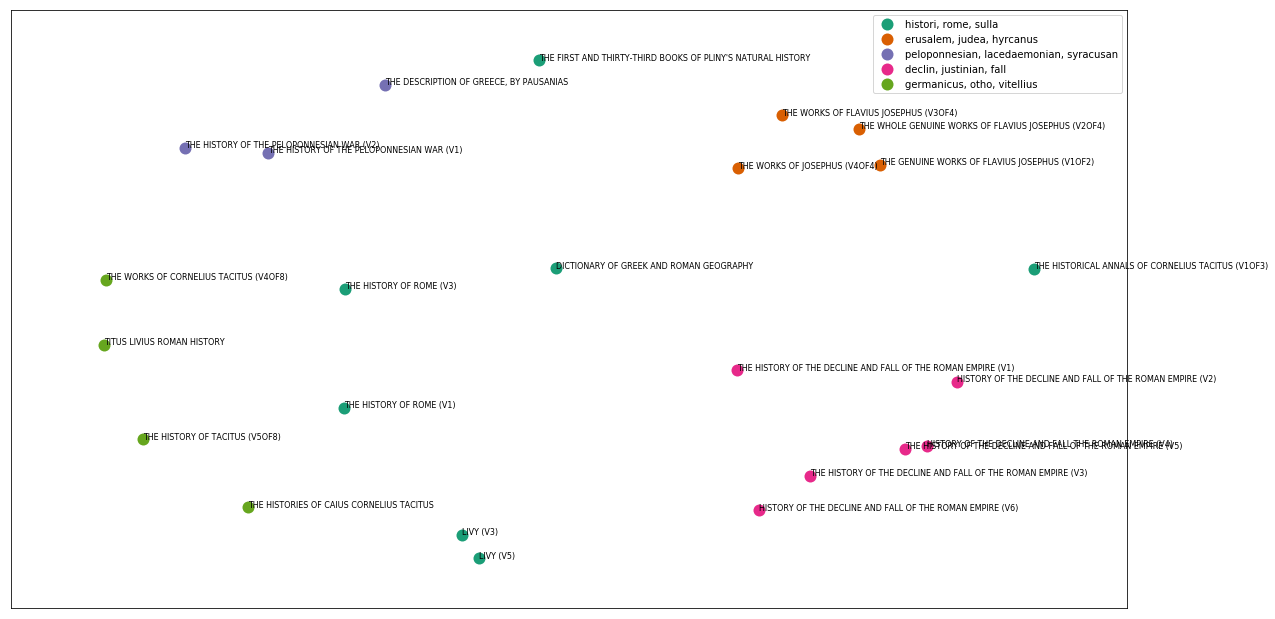

In [19]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=book_titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 11)) # set size
ax.margins(0.1) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('MDS.jpg', dpi=200)

In [ ]:
plt.close()

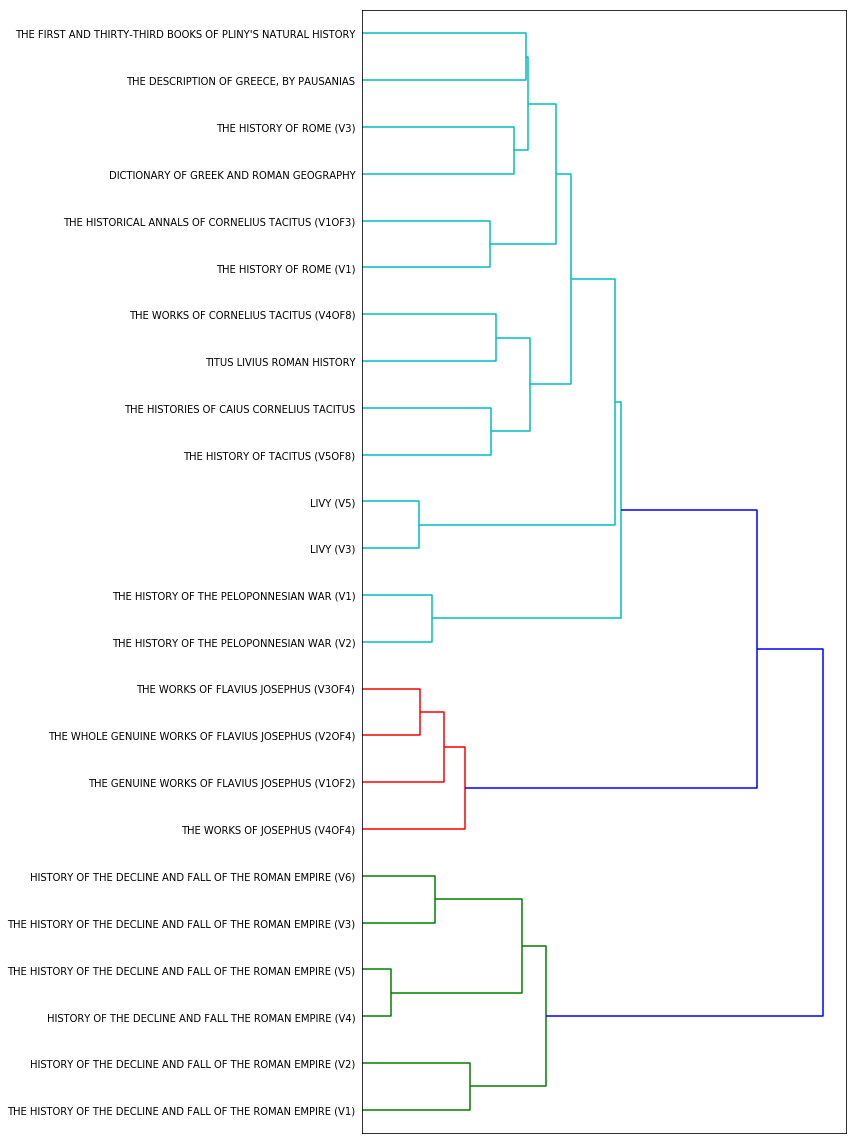

In [48]:
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(12, 16)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=book_titles);

plt.tick_params(\
    axis= 'x',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [53]:
pca = PCA(n_components=2)
pca.fit(dist)
#X1=pca.fit_transform(tfidf_matrix.toarray())

X_pca = pca.transform(dist)
X_pca.shape


xxs=X_pca[:, 0] 
yys=X_pca[:, 1]



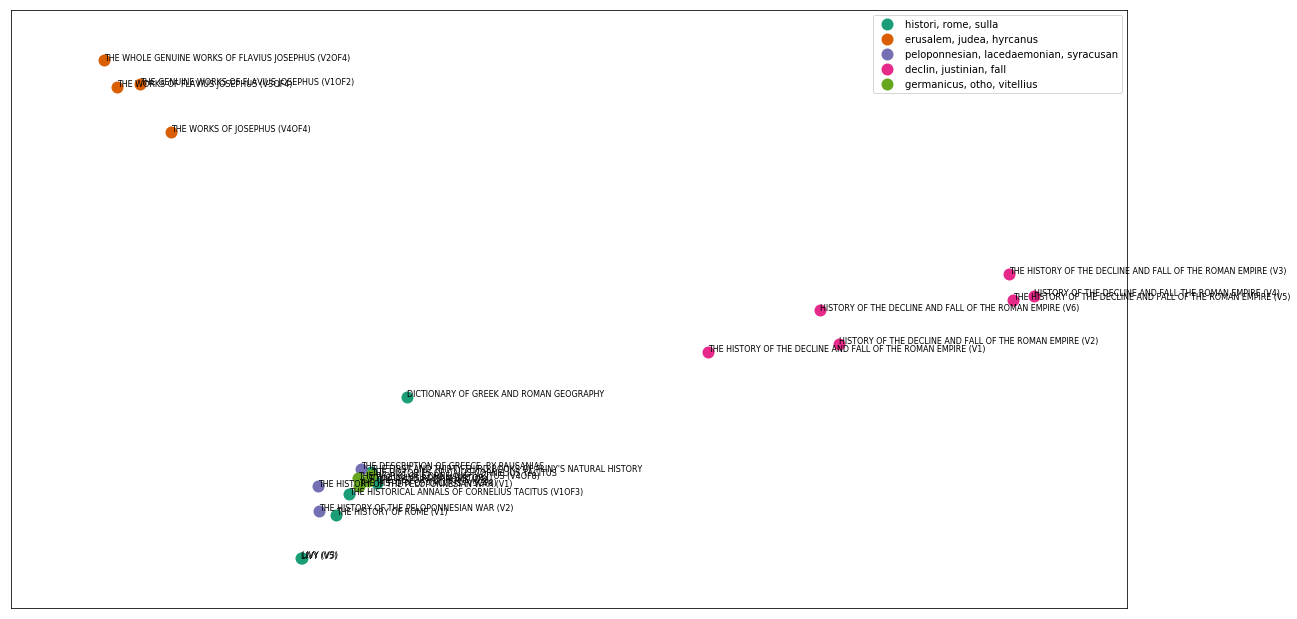

In [54]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xxs, y=yys, label=clusters, title=book_titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 11)) # set size
ax.margins(0.1) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('PCA.jpg', dpi=200)

In [ ]:
print
print
print
print
print
print
print

In [55]:
#IsoMap 
isomap = Isomap(n_components=2, n_neighbors=20)
isomap.fit(dist);
X_isomap = isomap.transform(dist)
X_isomap.shape

xxxs=X_isomap[:, 0] 
yyys=X_isomap[:, 1]





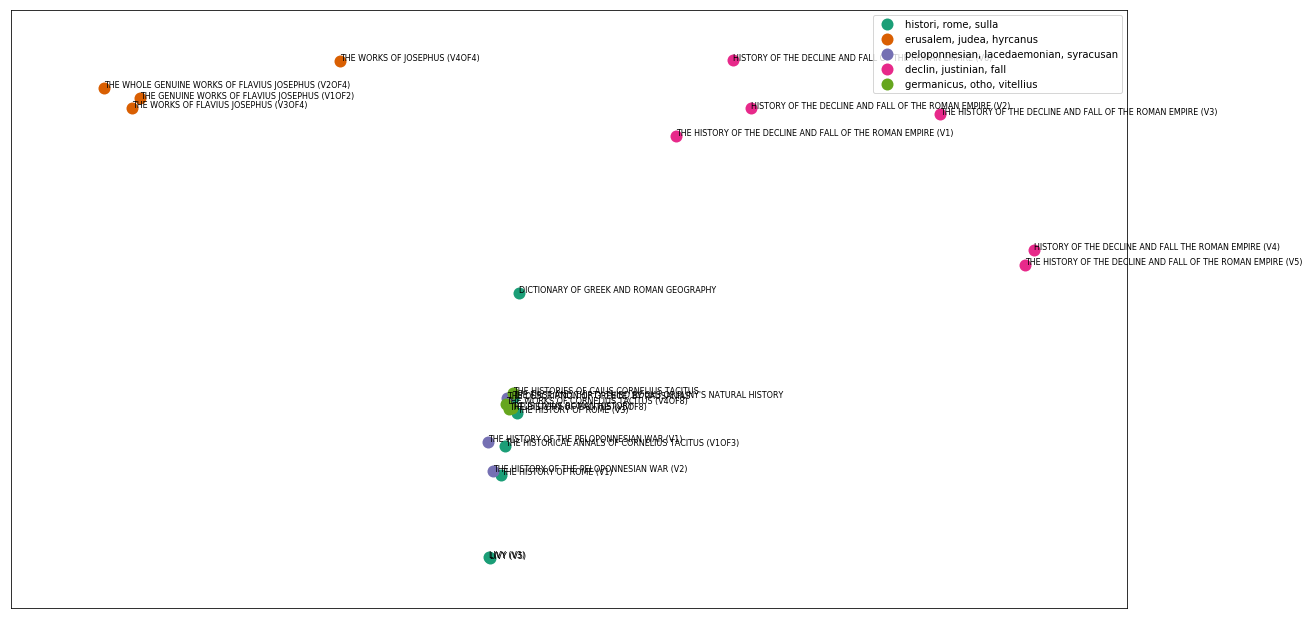

In [56]:
#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xxxs, y=yyys, label=clusters, title=book_titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 11)) # set size
ax.margins(0.1) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('ISOMAP.jpg', dpi=200)

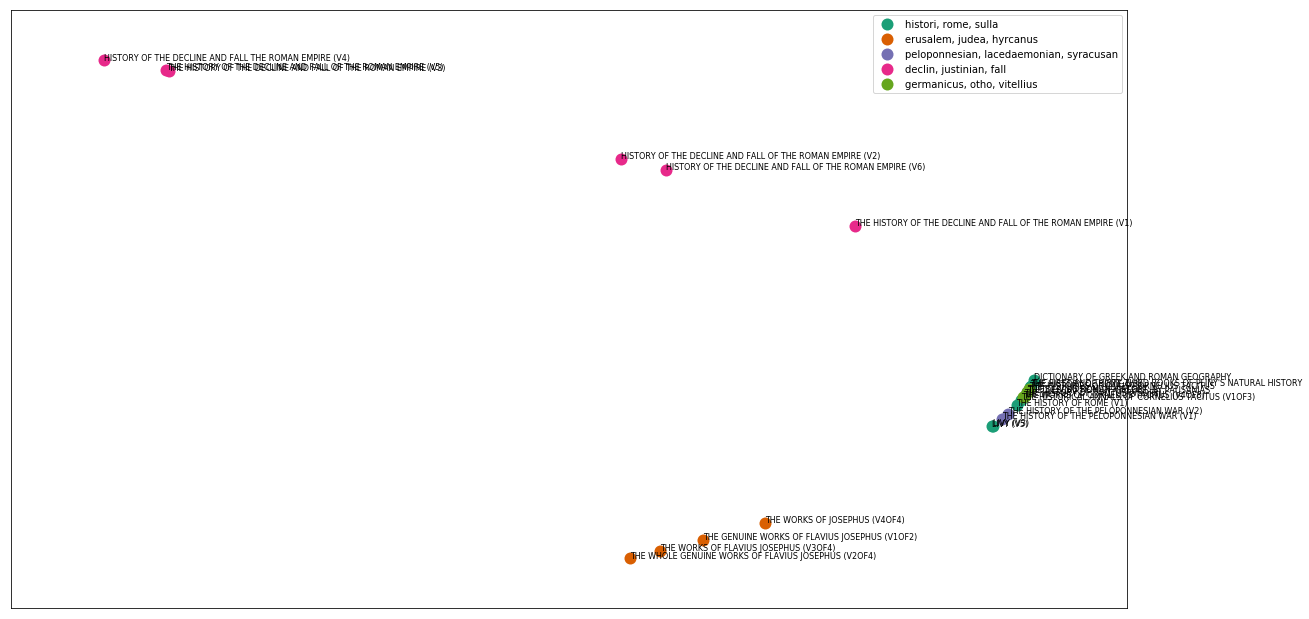

In [57]:
#SVD and LSA
from sklearn.preprocessing import Normalizer
lsa = TruncatedSVD(2, algorithm='randomized')
dtm_lsa = lsa.fit_transform(dist)
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

xxxxs = [w[0] for w in dtm_lsa]
yyyys = [w[1] for w in dtm_lsa]

#some ipython magic to show the matplotlib plots inline
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xxxxs, y=yyyys, label=clusters, title=book_titles)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(20, 11)) # set size
ax.margins(0.1) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  

    
    
#plt.show() #show the plot

#uncomment the below to save the plot if need be
plt.savefig('LSA1.jpg', dpi=200)

In [ ]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=book_titles)) 

#group by cluster
groups = df.groupby('label')

#define custom css to format the font and to remove the axis labeling
css = """
text.mpld3-text, div.mpld3-tooltip {
  font-family:Arial, Helvetica, sans-serif;
}

g.mpld3-xaxis, g.mpld3-yaxis {
display: none; }

svg.mpld3-figure {
margin-left: -200px;}
"""

# Plot 
fig, ax = plt.subplots(figsize=(14,6)) #set plot size
ax.margins(0.03) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    points = ax.plot(group.x, group.y, marker='o', linestyle='', ms=18, 
                     label=cluster_names[name], mec='none', 
                     color=cluster_colors[name])
    ax.set_aspect('auto')
    labels = [i for i in group.title]
    
    #set tooltip using points, labels and the already defined 'css'
    tooltip = mpld3.plugins.PointHTMLTooltip(points[0], labels,
                                       voffset=10, hoffset=10, css=css)
    #connect tooltip to fig
    mpld3.plugins.connect(fig, tooltip, TopToolbar())    
    
    #set tick marks as blank
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    
    #set axis as blank
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    
ax.legend(numpoints=1) #show legend with only one dot

mpld3.display() #show the plot

#uncomment the below to export to html
#html = mpld3.fig_to_html(fig)
#print(html)

In [ ]:
#Latent Dirichlet Allocation

In [26]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
import string
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
    return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()

In [27]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [28]:
from gensim import corpora, models, similarities 
Stopwords = nltk.corpus.stopwords.words('english')
#remove proper names
%time preprocess = [strip_proppers(doc) for doc in books]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in Stopwords] for text in tokenized_text]



CPU times: user 19.1 s, sys: 345 ms, total: 19.5 s
Wall time: 19.6 s
CPU times: user 1min 29s, sys: 837 ms, total: 1min 30s
Wall time: 1min 30s
CPU times: user 11.2 s, sys: 169 ms, total: 11.4 s
Wall time: 11.3 s


In [31]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]



In [32]:
lda=models.LdaModel(corpus, num_topics=5, 
                            id2word=dictionary, 
                            update_every=5, 
                            chunksize=10000, 
                            passes=100)

In [33]:
lda.show_topics()

[(0,
  u'0.013*"athenian" + 0.005*"peloponnesian" + 0.003*"scipio" + 0.003*"sulla" + 0.003*"sicili" + 0.002*"carthaginian" + 0.002*"lucius" + 0.002*"hath" + 0.002*"hannib" + 0.002*"samnit"'),
 (1,
  u'0.004*"tacitus" + 0.003*"galba" + 0.003*"vitellius" + 0.003*"otho" + 0.003*"non" + 0.002*"sed" + 0.002*"patrician" + 0.002*"qui" + 0.002*"cum" + 0.002*"thefe"'),
 (2,
  u'0.021*"jew" + 0.009*"herod" + 0.007*"josephus" + 0.006*"jerusalem" + 0.003*"prophet" + 0.003*"judea" + 0.003*"hath" + 0.003*"david" + 0.003*"mose" + 0.003*"hyrcanus"'),
 (3,
  u'0.007*"strab" + 0.005*"plin" + 0.004*"site" + 0.004*"plini" + 0.004*"strabo" + 0.004*"tbe" + 0.003*"liv" + 0.003*"ptolemi" + 0.003*"district" + 0.003*"valley"'),
 (4,
  u'0.007*"lib" + 0.004*"christian" + 0.004*"justinian" + 0.004*"hist" + 0.003*"church" + 0.003*"constantinopl" + 0.002*"goth" + 0.002*"belisarius" + 0.002*"mahomet" + 0.002*"constantin"')]

In [42]:
frame

,title,cluster
0,DICTIONARY OF GREEK AND ROMAN GEOGRAPHY,0
4,THE HISTORY OF TACITUS (V5OF8),4
2,THE HISTORY OF THE PELOPONNESIAN WAR (V2),2
3,THE HISTORY OF THE DECLINE AND FALL OF THE ROM...,3
0,THE HISTORY OF ROME (V1),0
1,THE WHOLE GENUINE WORKS OF FLAVIUS JOSEPHUS (V...,1
3,THE HISTORY OF THE DECLINE AND FALL OF THE ROM...,3
2,"THE DESCRIPTION OF GREECE, BY PAUSANIAS",2
0,THE HISTORY OF ROME (V3),0
0,LIVY (V3),0
